In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
import matplotlib as mpl
from scipy import stats

In [2]:
with open("../data/resources/rcParams.yaml") as f:
    rcParamsDict = yaml.full_load(f)
    for k in rcParamsDict["rcParams"]:
        print("{} {}".format(k,rcParamsDict["rcParams"][k]))
        plt.rcParams[k] = rcParamsDict["rcParams"][k]
    for k1 in set(list(rcParamsDict)).difference(set(["rcParams"])):
        print("{} {}".format(k1,rcParamsDict[k1]))

figure.dpi 80
savefig.dpi 500
figure.figsize [10, 10]
axes.facecolor None
figure.facecolor None
dotSize 20


In [3]:
df = pd.read_csv('../../data/csv/organoidMultiplexing_growthCurves_quant.csv')

In [4]:
df = df[df.Line != 'MIX7']

donor_map_names = {i:j for i, j in zip(df['Line'], df['Line'])}
donor_map_names['CHD2WT'] = 'UCSFi001-A'
donor_map_names['CHD8WT'] = 'H9'
df['Line'] = df['Line'].map(donor_map_names)

In [5]:
line_palette = {
 'CTL01A': '#DBB807',
    'CTL08A': '#0FB248',
    'CTL04E': '#FF0054',
    'CTL02A': '#7B00FF',
'H9': '#72190E',
 'H1': '#994F88',
 'CTL05A': '#1965B0',
 'CTL07C': '#437DBF',
 'CTL06F': '#CAE0AB',
 'CTL09A': '#FFFF00',
 'KTD8.2': '#E65518',
 'UCSFi001-A': '#7BAFDE',
'MIX1':'#EF6F6C',
'MIX2':'#EF6F6C',
'MIX3':'#EF6F6C',
'MIX4':'#EF6F6C',
'MIX5':'#EF6F6C',
'MIX6':'#EF6F6C',
'MIX8':'#EF6F6C',}

# Lineplot area not normalized

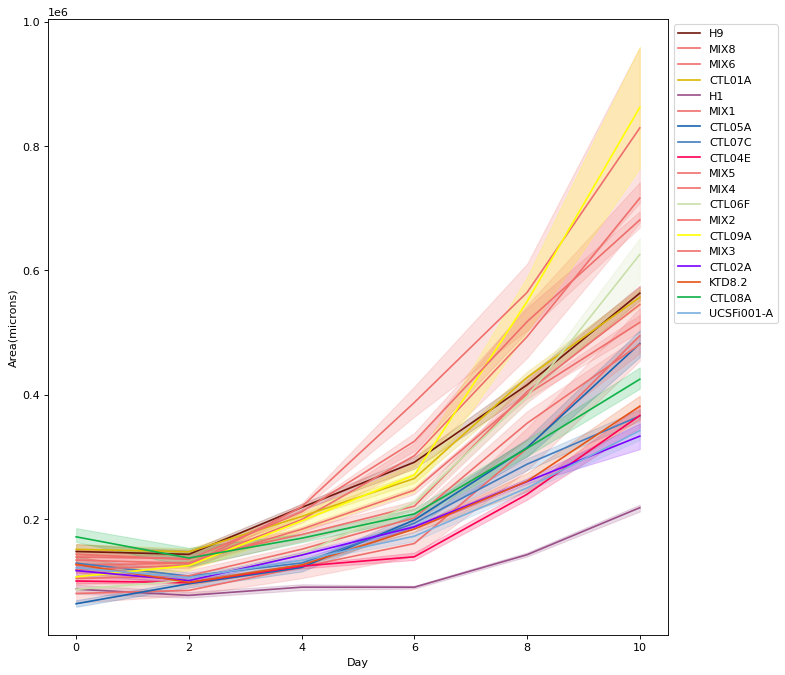

In [6]:
sns.lineplot(data = df, x = 'Day', y = 'Area(microns)', hue = 'Line', palette=line_palette)
plt.legend(bbox_to_anchor = (1,1))

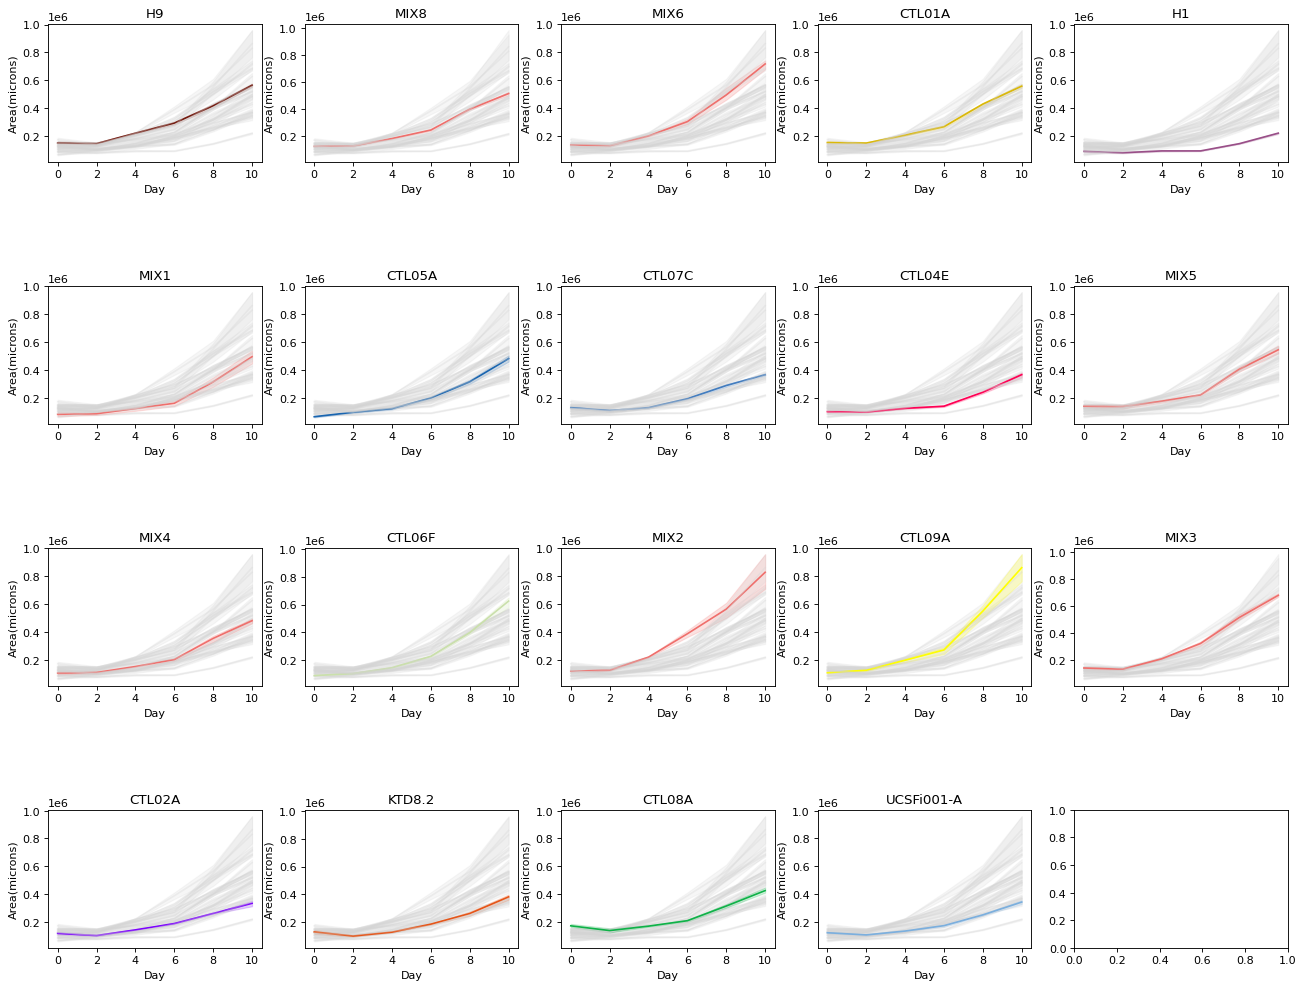

In [7]:
fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.9})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]
    highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='Area(microns)', hue='Line', palette=palette, ax = ax, legend = None)
    ax.set_title(l)
    
plt.show()

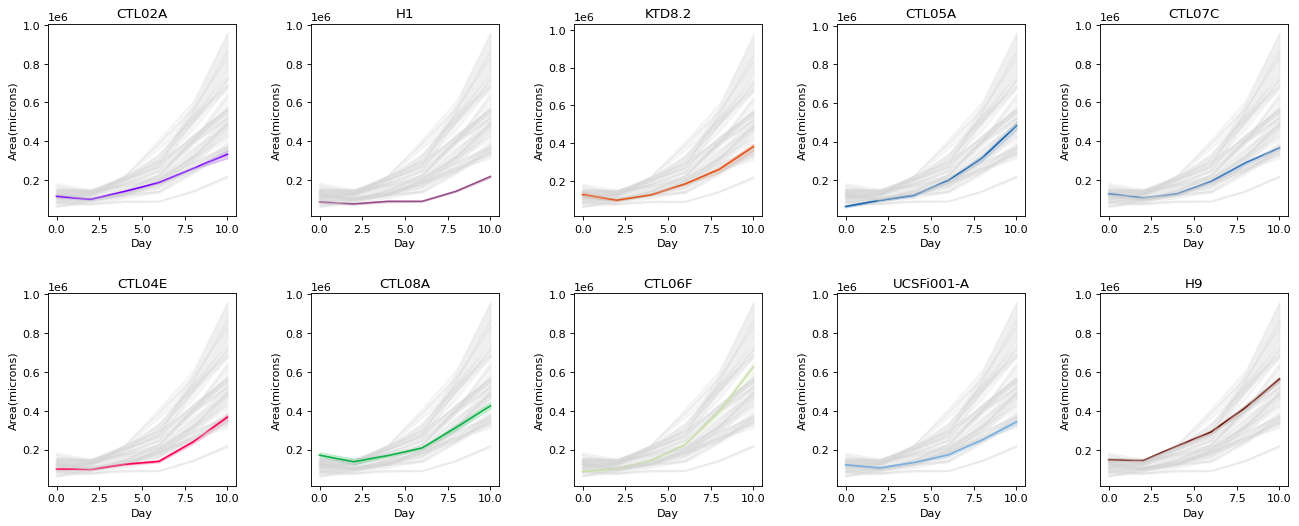

In [8]:
# plotting according to order in CENSUS Seq day 5
order =  ["CTL02A", 
"H1", 
"KTD8.2", 
"CTL05A", 
"CTL07C", 
"CTL04E", 
"CTL08A", 
"CTL06F", 
"UCSFi001-A", 
"H9", 
"CTL01A", 
"CTL09A"]

fig, axs = plt.subplots(2, 5, figsize = (20,7.5), gridspec_kw = {'hspace': 0.4, 'wspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(order, axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='Area(microns)', hue='Line', palette=palette, ax = ax, legend = None)
    ax.set_title(l)
    
plt.show()

## Plot only organoids generated from Mix of hPSC

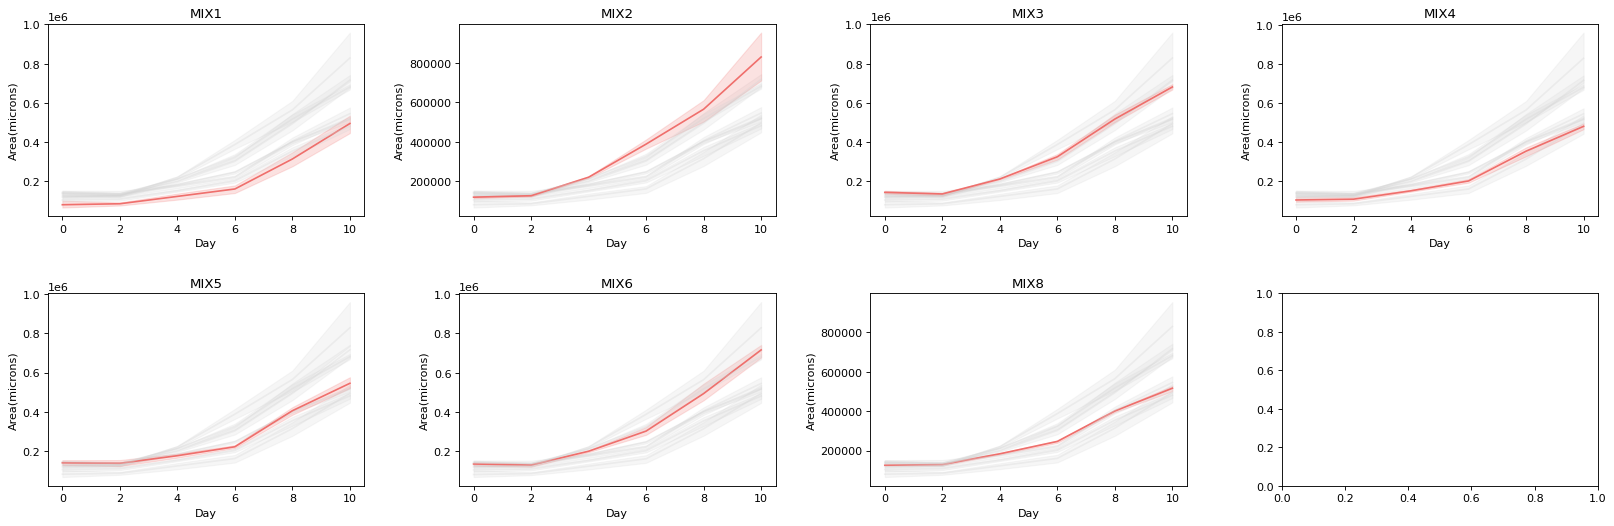

In [9]:
fig, axs = plt.subplots(2, 4, figsize = (25,7.5), gridspec_kw = {'hspace': 0.4, 'wspace': 0.3})
axs = axs.flatten().T

only_mix = df[df.Line.str.startswith('MIX')]
only_mix_ordered = only_mix.Line.unique().tolist()
only_mix_ordered.sort()

for l, ax in zip(only_mix_ordered, axs):
    
    palette = {line: '#d3d3d350' for line in only_mix_ordered}
    palette[l] = line_palette[l]

    sns.lineplot(data=only_mix, x='Day', y='Area(microns)', hue='Line', palette=palette, ax = ax, legend = None)

    ax.set_title(l)
    
plt.show()

# Lineplots normalized area
In the following plots the area of each organoid is normalized on the area they had at day 0.

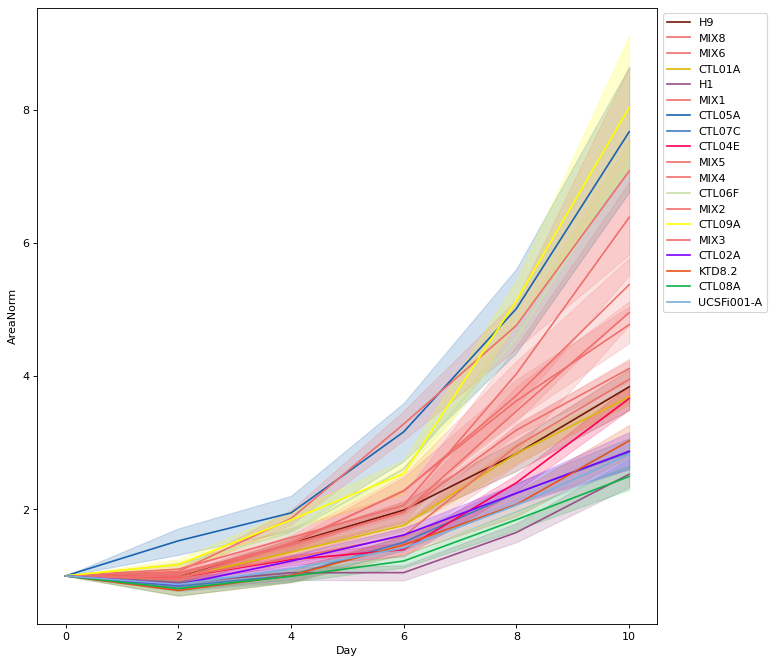

In [10]:
sns.lineplot(data = df, x = 'Day', y = 'AreaNorm', hue = 'Line', palette=line_palette)
plt.legend(bbox_to_anchor = (1,1))

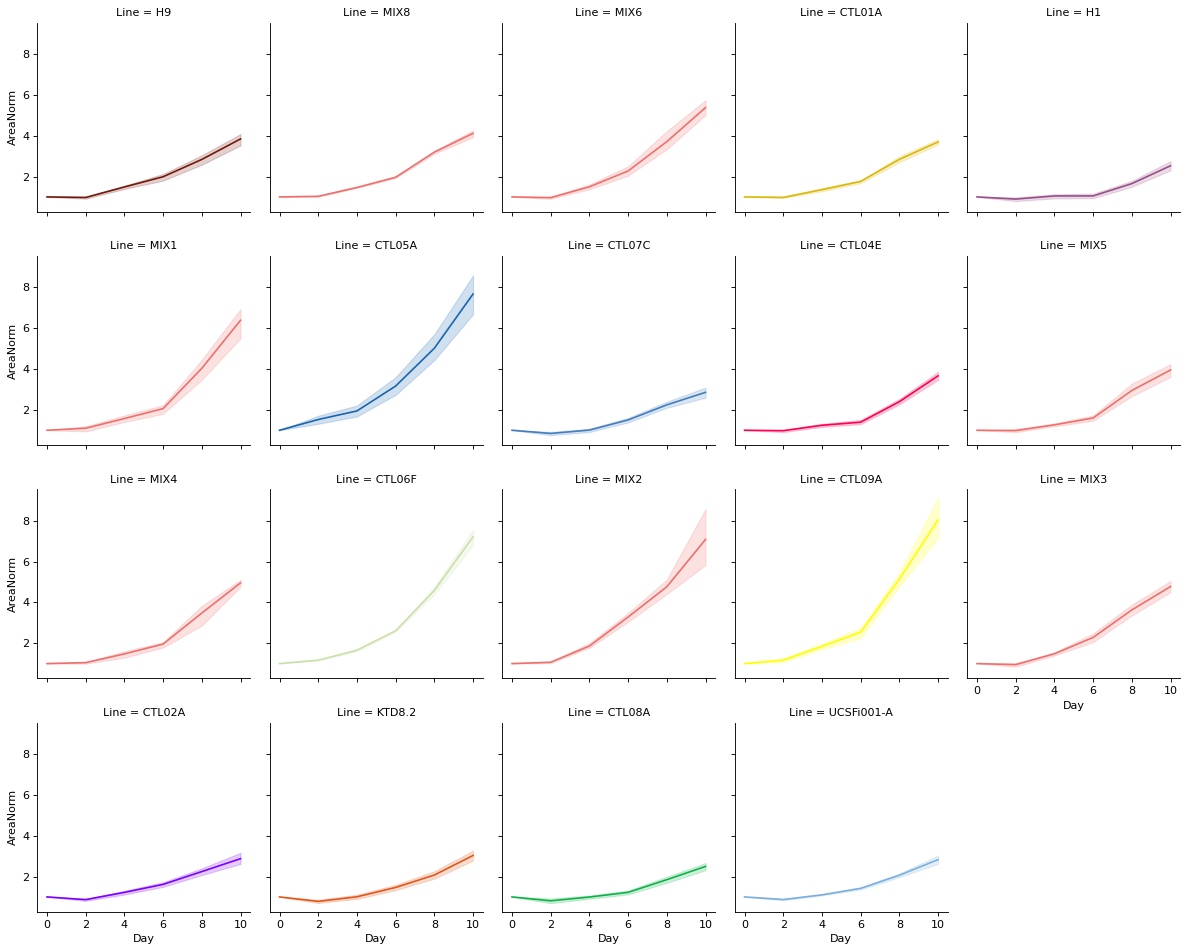

In [11]:
g = sns.FacetGrid(df, col="Line", col_wrap=5, hue = 'Line', palette=line_palette)
g.map_dataframe(sns.lineplot, x="Day", y = 'AreaNorm')

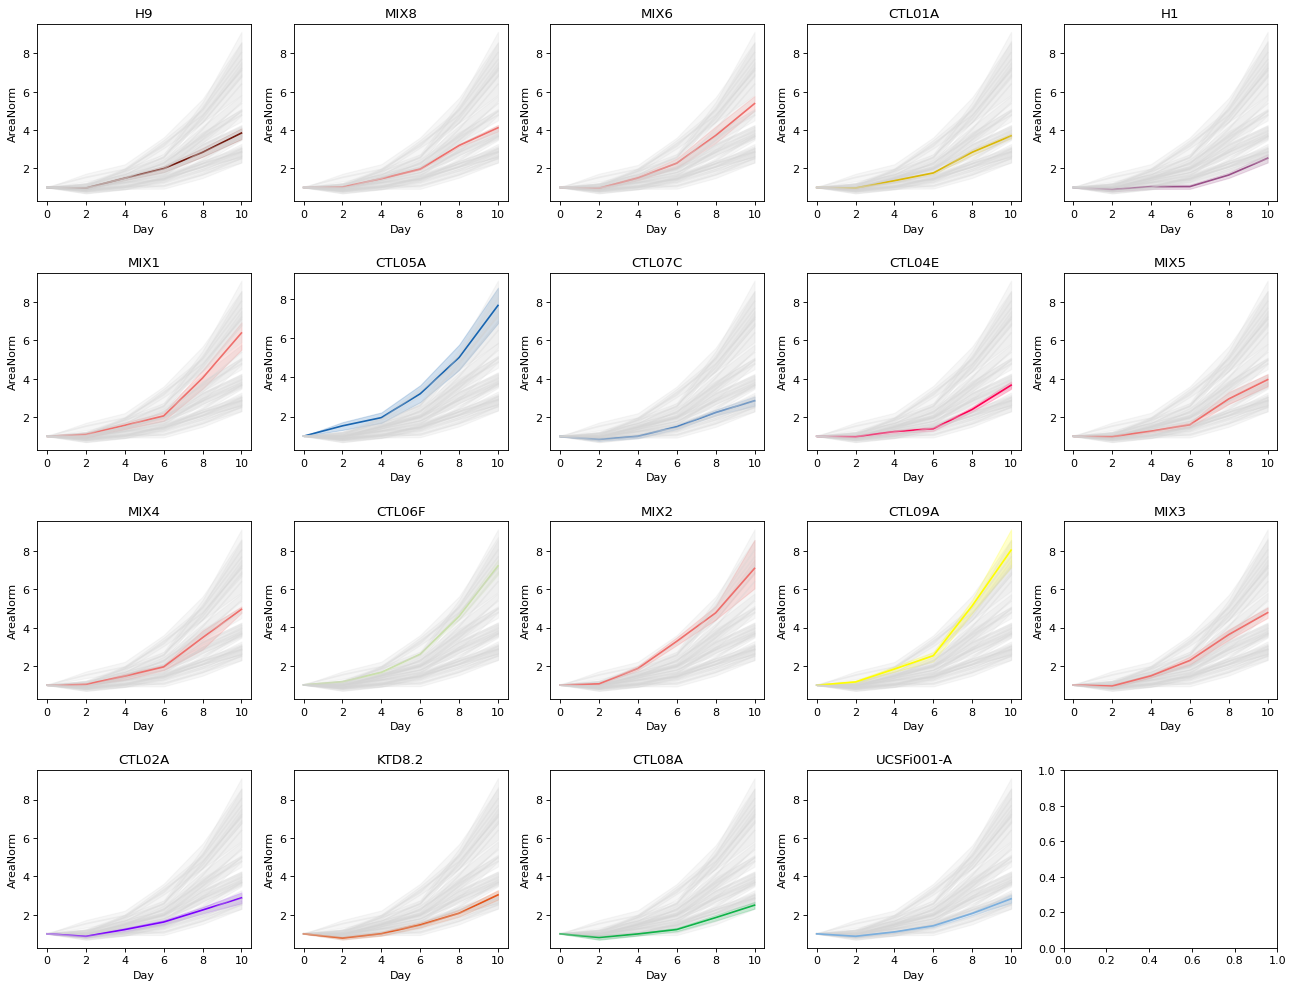

In [12]:
fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaNorm', hue='Line', palette=palette, ax = ax, legend = None)

    ax.set_title(l)
    
plt.show()

In [13]:
import warnings

warnings.filterwarnings('ignore')

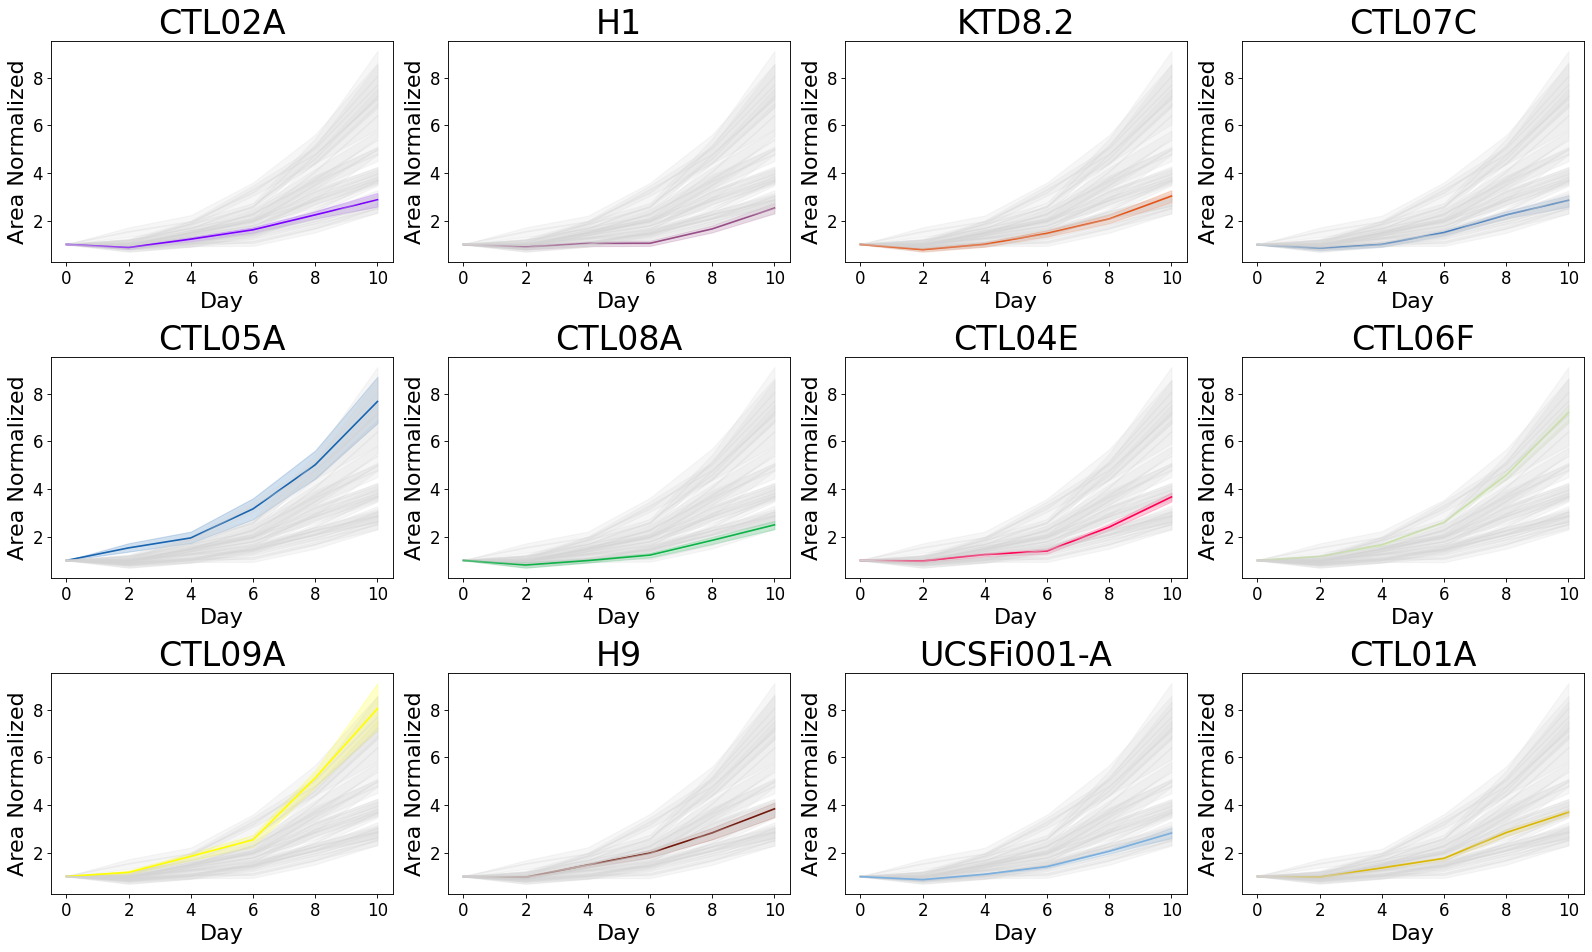

In [14]:
order = ["CTL02A"
,"H1"
,"KTD8.2"
,"CTL07C"
,"CTL05A"
,"CTL08A"
,"CTL04E"
,"CTL06F"
,"CTL09A"
,"H9"
,"UCSFi001-A"
,"CTL01A"]

fig, axs = plt.subplots(3, 4, figsize = (20,12))
axs = axs.flatten().T


for l, ax in zip(order, axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]
    highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaNorm', hue='Line', palette=palette, ax = ax, legend = None)
    
    ax.set_title(l, fontsize = 30)
    ax.set_ylabel('Area Normalized', fontsize = 20)
    ax.set_xlabel('Day', fontsize = 20)
    _ = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
    _ = ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
    
plt.tight_layout()
plt.savefig('./figures/CBO_GC_pureLines.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

## Plot only organoids generated from Mix of hPSC

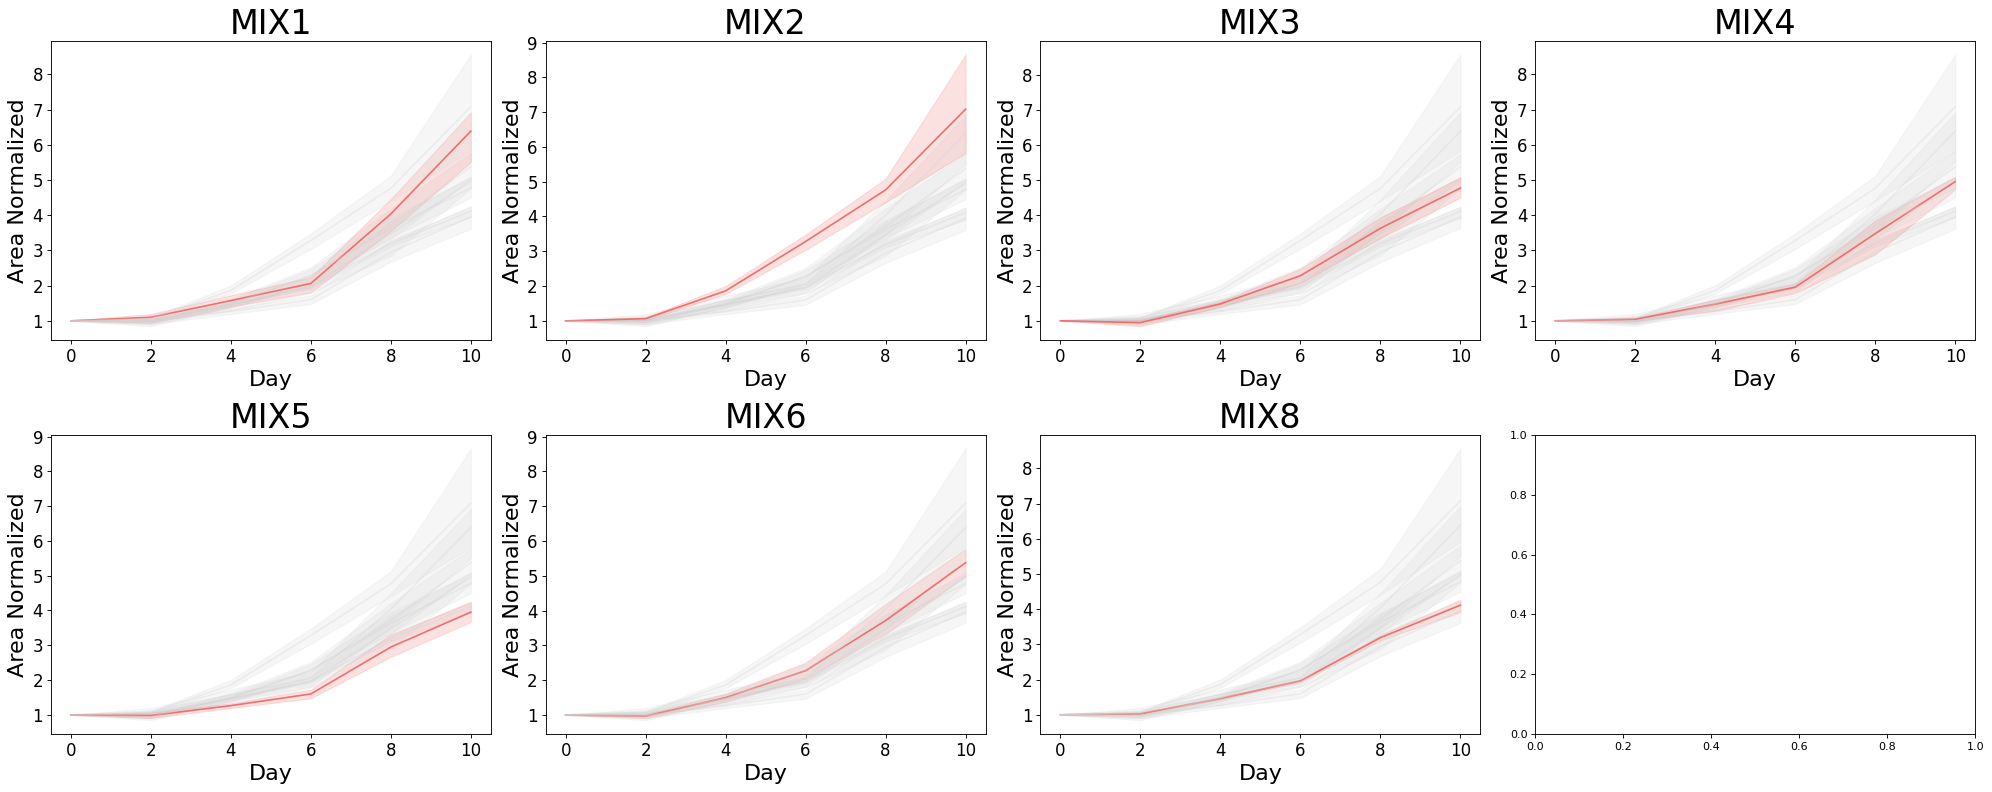

In [15]:
fig, axs = plt.subplots(2, 4, figsize = (25,10))
axs = axs.flatten().T

only_mix = df[df.Line.str.startswith('MIX')]
only_mix_ordered = only_mix.Line.unique().tolist()
only_mix_ordered.sort()

for l, ax in zip(only_mix_ordered, axs):
    
    palette = {line: '#d3d3d350' for line in only_mix_ordered}
    palette[l] = line_palette[l]

    sns.lineplot(data=only_mix, x='Day', y='AreaNorm', hue='Line', palette=palette, ax = ax, legend = None)
    #ax.legend('off')

    ax.set_title(l, fontsize = 30)
    ax.set_ylabel('Area Normalized', fontsize = 20)
    ax.set_xlabel('Day', fontsize = 20)
    _ = ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
    _ = ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)

plt.tight_layout()
plt.savefig('./figures/CBO_GC_MIX.svg', bbox_inches = 'tight')
plt.show()

## Plot only organoids not generated from Mix of hPSC

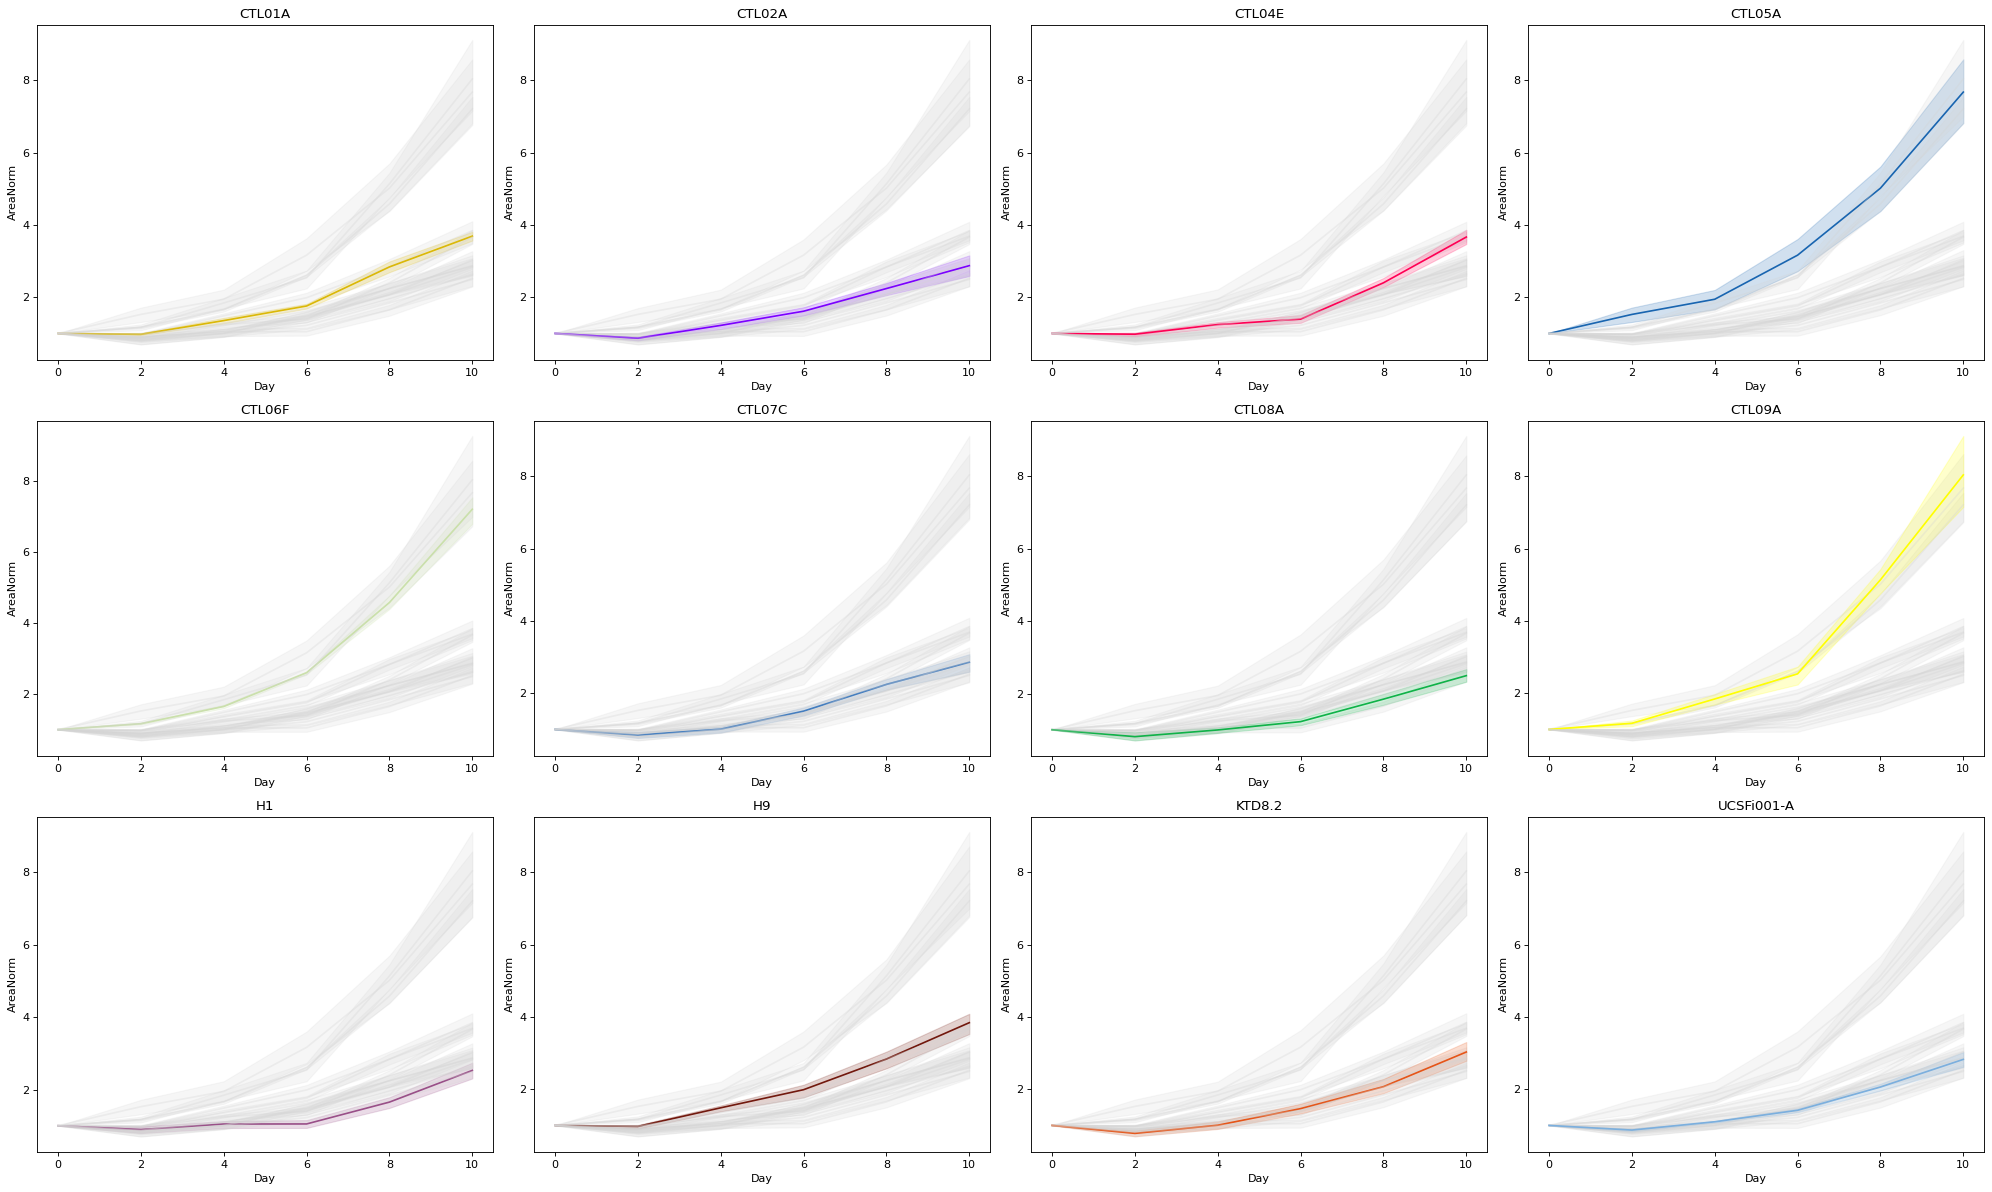

In [16]:
fig, axs = plt.subplots(3, 4, figsize = (25,15))
axs = axs.flatten().T

only_mix = df[~df.Line.str.startswith('MIX')]
only_mix_ordered = only_mix.Line.unique().tolist()
only_mix_ordered.sort()

for l, ax in zip(only_mix_ordered, axs):
    
    palette = {line: '#d3d3d350' for line in only_mix_ordered}
    palette[l] = line_palette[l]

    sns.lineplot(data=only_mix, x='Day', y='AreaNorm', hue='Line', palette=palette, ax = ax, legend = None)
    #ax.legend('off')

    ax.set_title(l)

plt.tight_layout()
plt.show()

# Discrete derivative and cumulative

For each replicate of each line, I'm computing here:
* the discrete derivative of the area (`AreaDeriv`)
* the discrete derivate the normalized area (`AreaNormDeriv`)
* the cumulative sum of the discrete derivative of the area (`AreaCumul`)
* the cumulative sum of the discrete derivative of the normalized area (`AreaNormCumul`)
* the cumulative sum of the area (`cumulativeArea`)

In [17]:
df.index = df.FileName

smoothed = pd.Series()
derivative = pd.Series()
cumulative = pd.Series()

derivative_not_norm = pd.Series()
cumulative_not_norm = pd.Series()

cumulative_area = pd.Series()

for l in df.LineRep.unique():
    

    highlighted_data = df[df['LineRep'] == l]
    #print(l)
    highlighted_data = highlighted_data.sort_values(by = 'Day')
    
    highlighted_data['derivative'] = highlighted_data['AreaNorm'].diff() / highlighted_data['Day'].diff()
    highlighted_data['cumulative'] = highlighted_data['derivative'].cumsum()
    
    highlighted_data['cumulativeArea'] = highlighted_data['area'].cumsum()
    
    highlighted_data['derivative_not_norm'] = highlighted_data['area'].diff() / highlighted_data['Day'].diff()
    highlighted_data['cumulative_not_norm'] = highlighted_data['derivative_not_norm'].cumsum()
    
    derivative = derivative._append(highlighted_data['derivative'])
    cumulative = cumulative._append(highlighted_data['cumulative'])
    
    derivative_not_norm = derivative_not_norm._append(highlighted_data['derivative_not_norm'])
    cumulative_not_norm = cumulative_not_norm._append(highlighted_data['cumulative_not_norm'])

    cumulative_area = cumulative_area._append(highlighted_data['cumulativeArea'])

In [18]:
df['AreaNormDeriv'] = derivative
df['AreaNormCumul'] = cumulative

df['AreaDeriv'] = derivative_not_norm
df['AreaCumul'] = cumulative_not_norm

df['cumulativeArea'] = cumulative_area

## Derivative of the area 

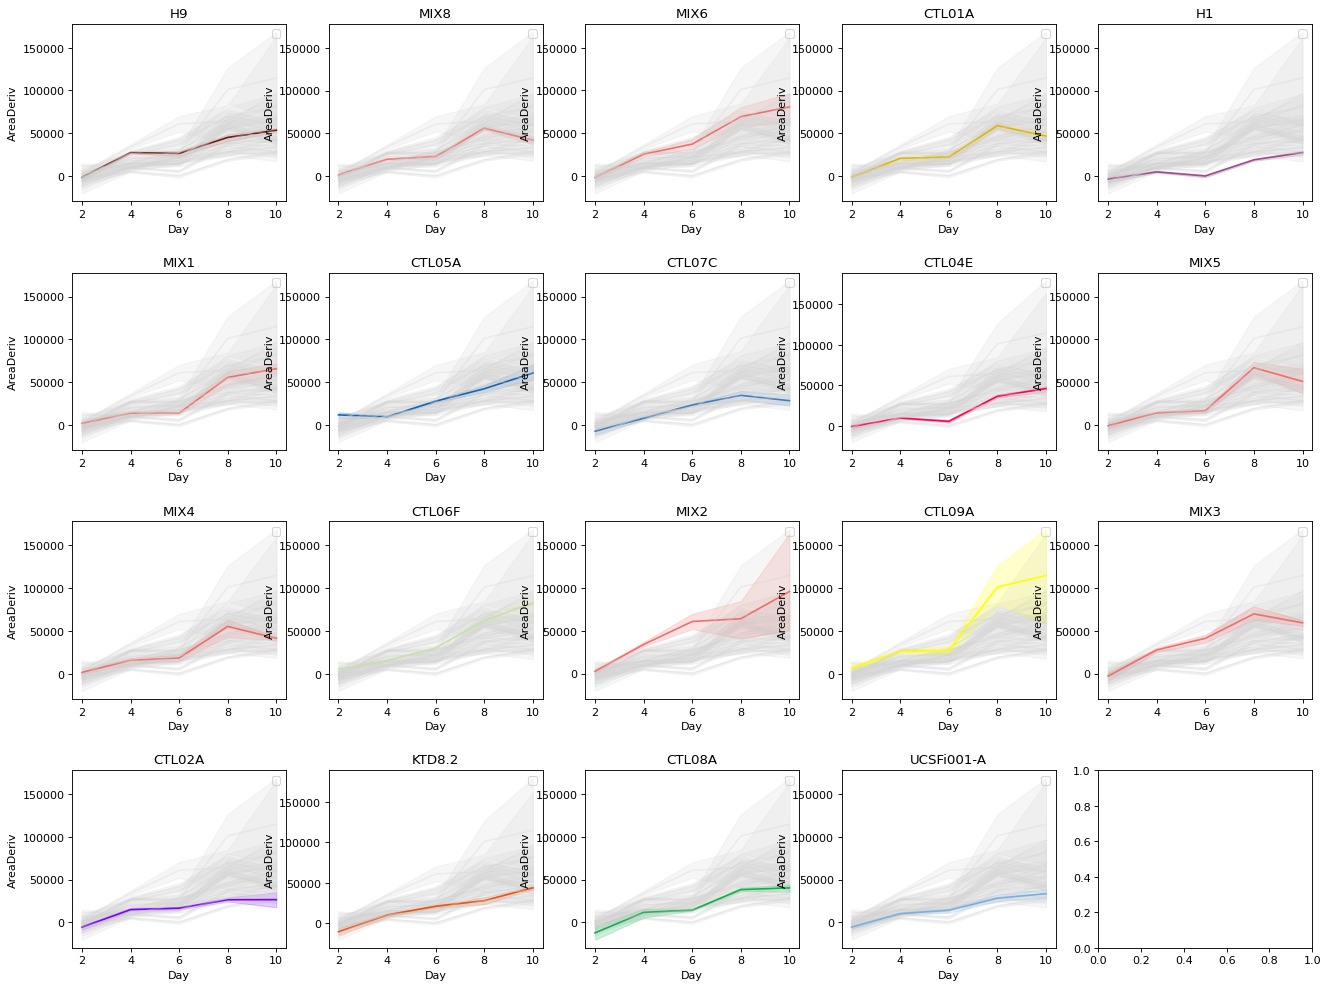

In [19]:

fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    #highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaDeriv', hue='Line', palette=palette, ax = ax, markers='.', legend = None)
    ax.legend('')

    ax.set_title(l)

plt.tight_layout()
plt.show()

## Derivative of the normalized area 

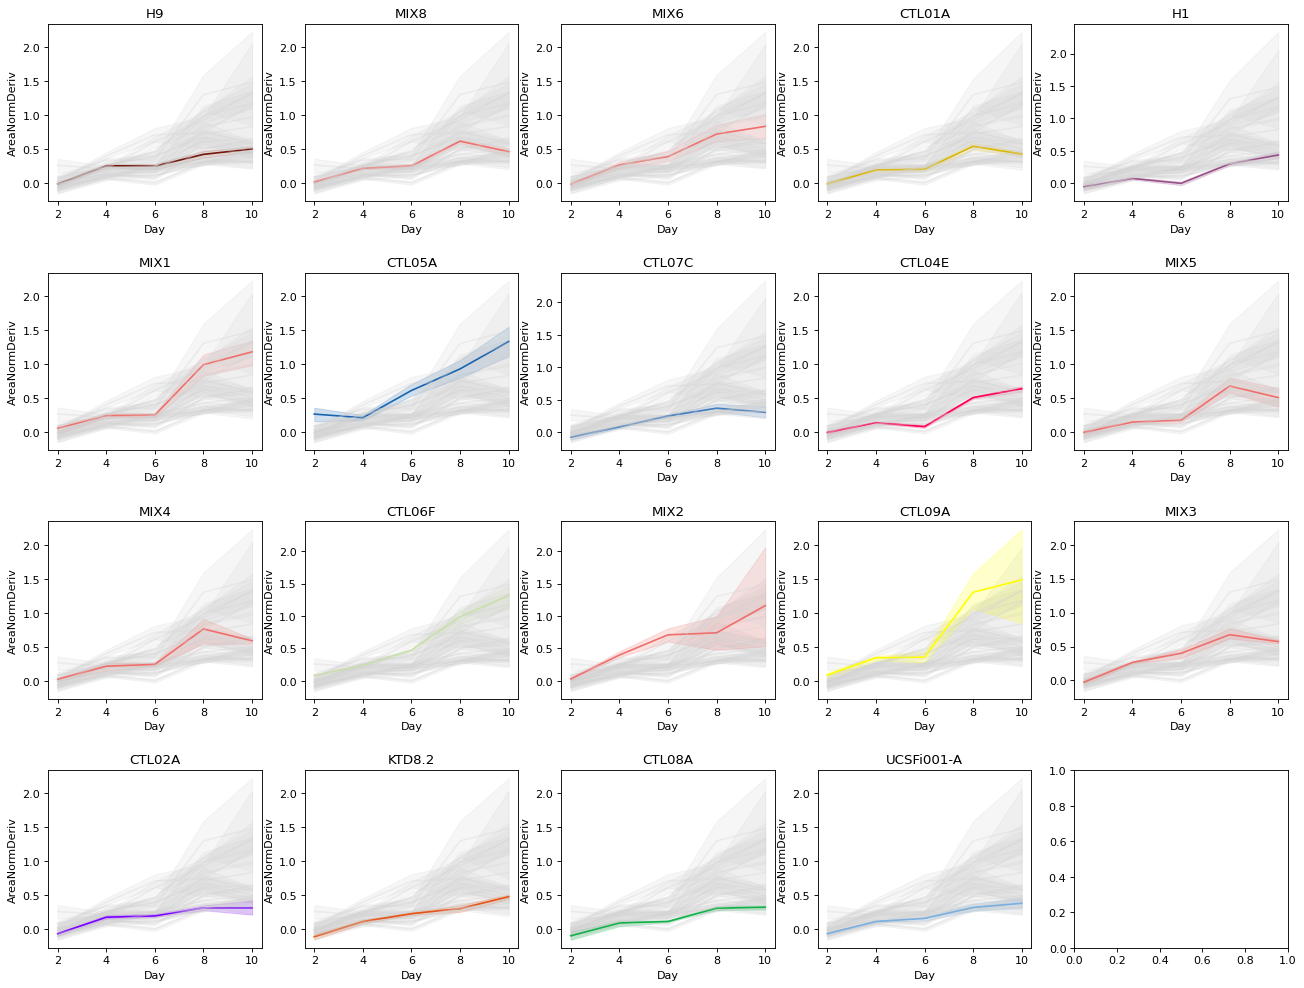

In [20]:
fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    #highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaNormDeriv', hue='Line', palette=palette, ax = ax, markers='.', legend = None)
    ax.set_title(l)

plt.tight_layout()
plt.show()

## Cumulative measure of the area

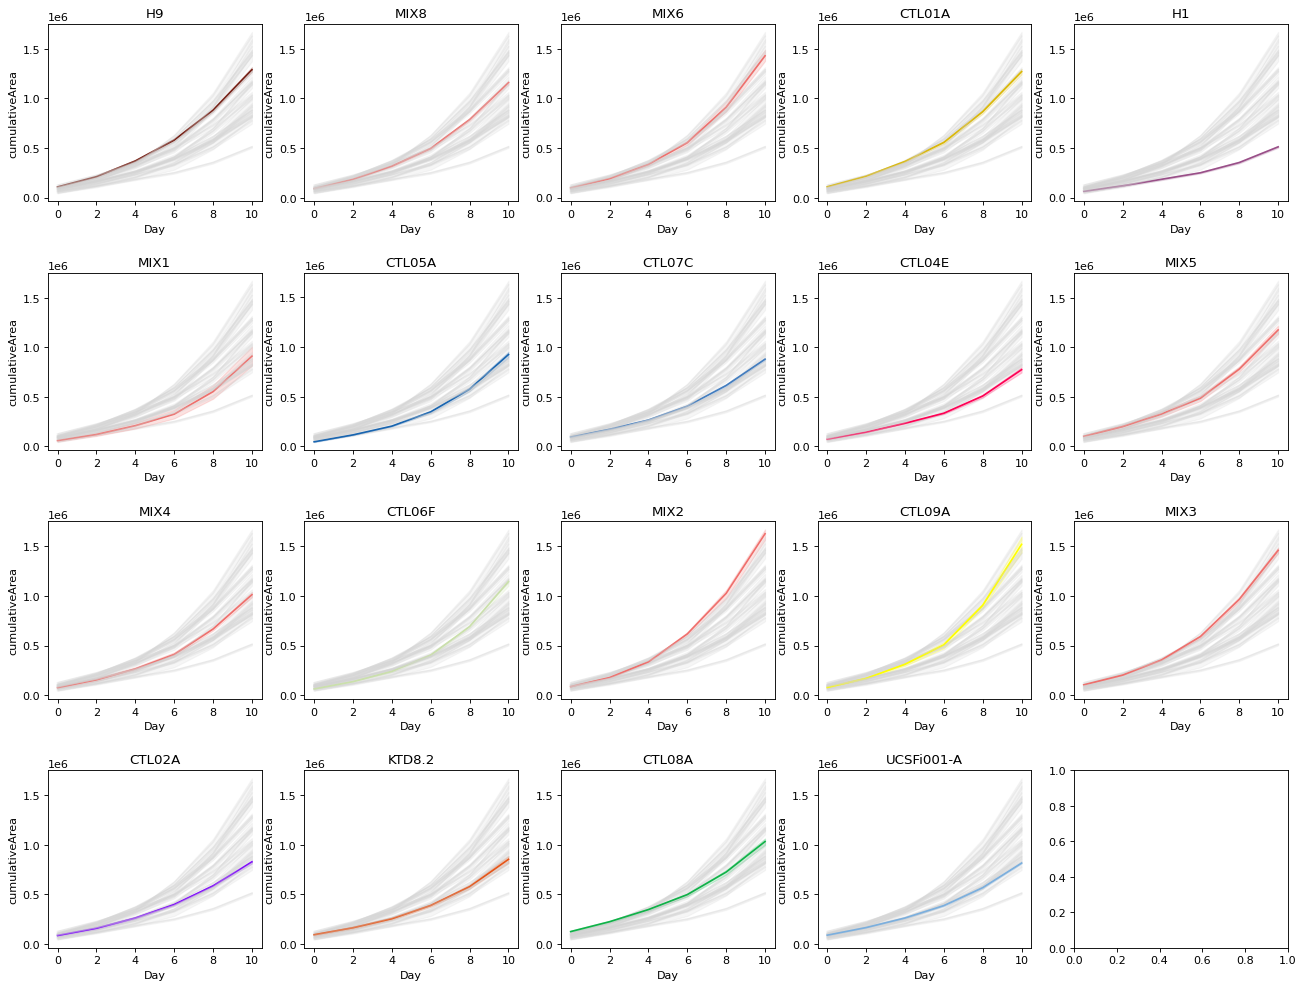

In [21]:
fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    sns.lineplot(data=df, x='Day', y='cumulativeArea', hue='Line', palette=palette, ax = ax, markers='.', legend = None)
    ax.set_title(l)

plt.tight_layout()
plt.show()

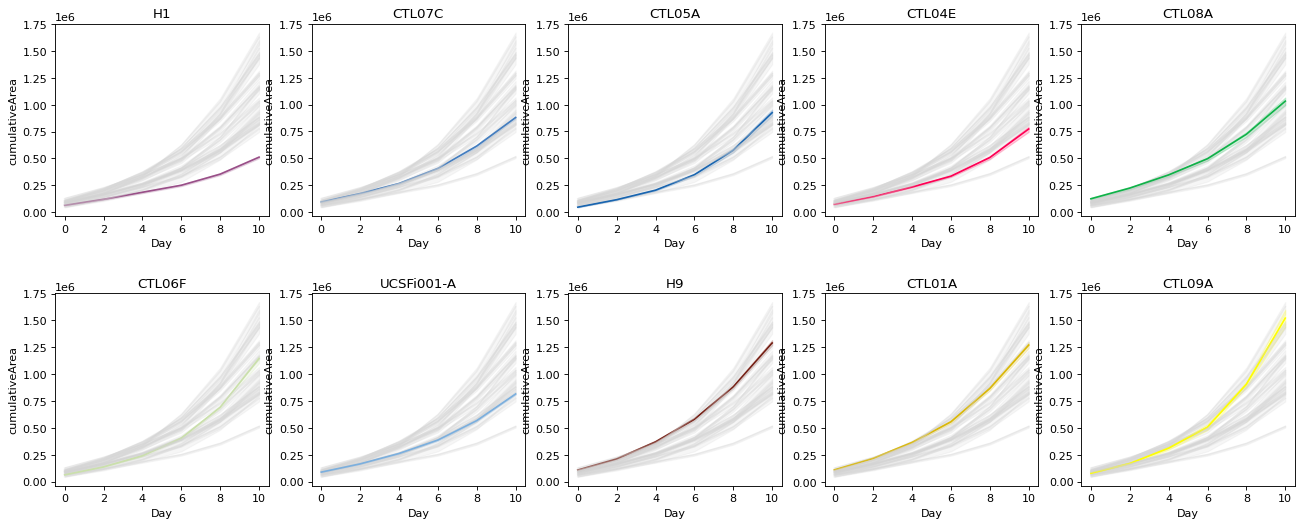

In [22]:
order =  ['H1',
 'CTL07C',
 'CTL05A',
 'CTL04E',
 'CTL08A',
 'CTL06F',
 'UCSFi001-A',
 'H9',
 'CTL01A',
 'CTL09A']

fig, axs = plt.subplots(2, 5, figsize = (20,7.5), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(order, axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='cumulativeArea', hue='Line', palette=palette, ax = ax, legend = None)

    ax.set_title(l)
    
plt.tight_layout()
plt.show()

## Cumulative sum of the discrete derivative of the area

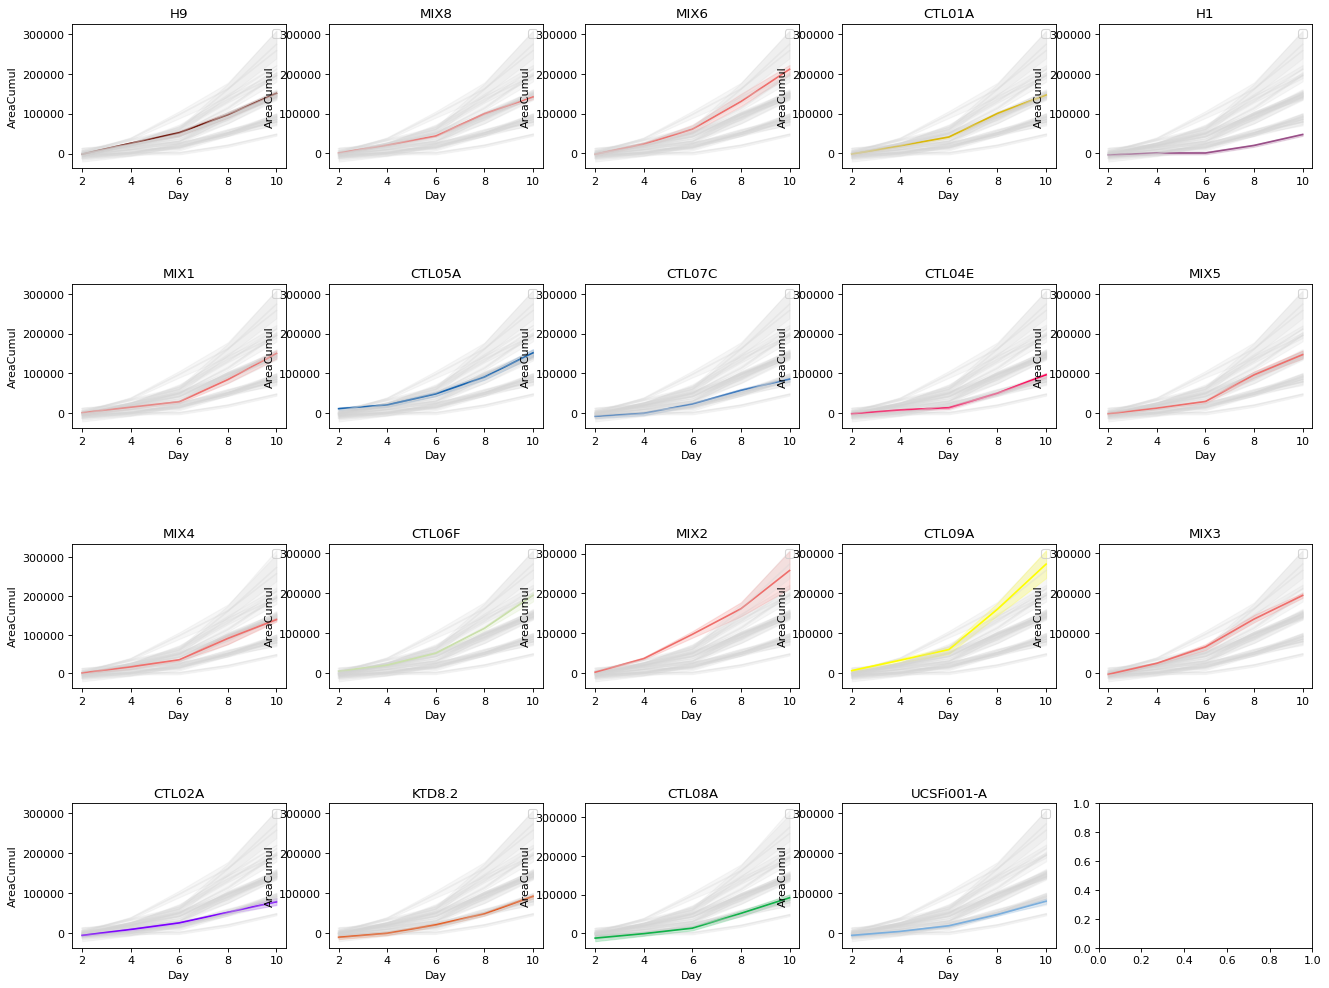

In [23]:

fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.8})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    #highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaCumul', hue='Line', palette=palette, ax = ax, markers='.')
    ax.legend('')

    ax.set_title(l)

plt.tight_layout()
plt.show()

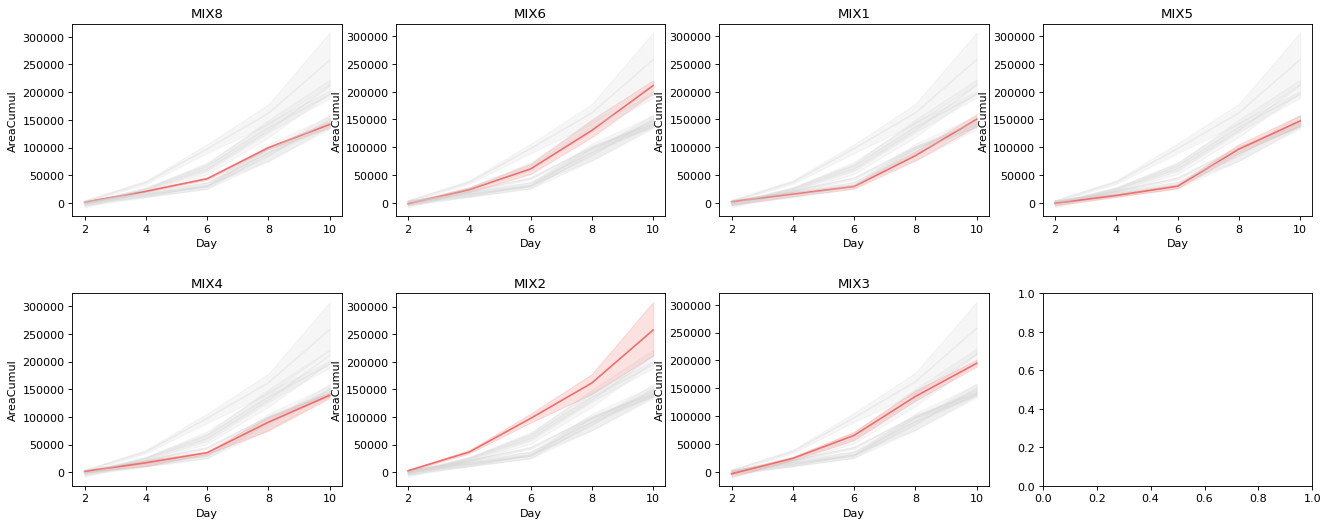

In [24]:
# only MIX
fig, axs = plt.subplots(2, 4, figsize = (20,7.5), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T

only_mix = df[df.Line.str.startswith('MIX')]

for l, ax in zip(only_mix.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in only_mix['Line'].unique()}
    palette[l] = line_palette[l]

    sns.lineplot(data=only_mix, x='Day', y='AreaCumul', hue='Line', palette=palette, ax = ax, legend = None)

    ax.set_title(l)
    
plt.show()

## Cumulative sum of the discrete derivative of the normalized area

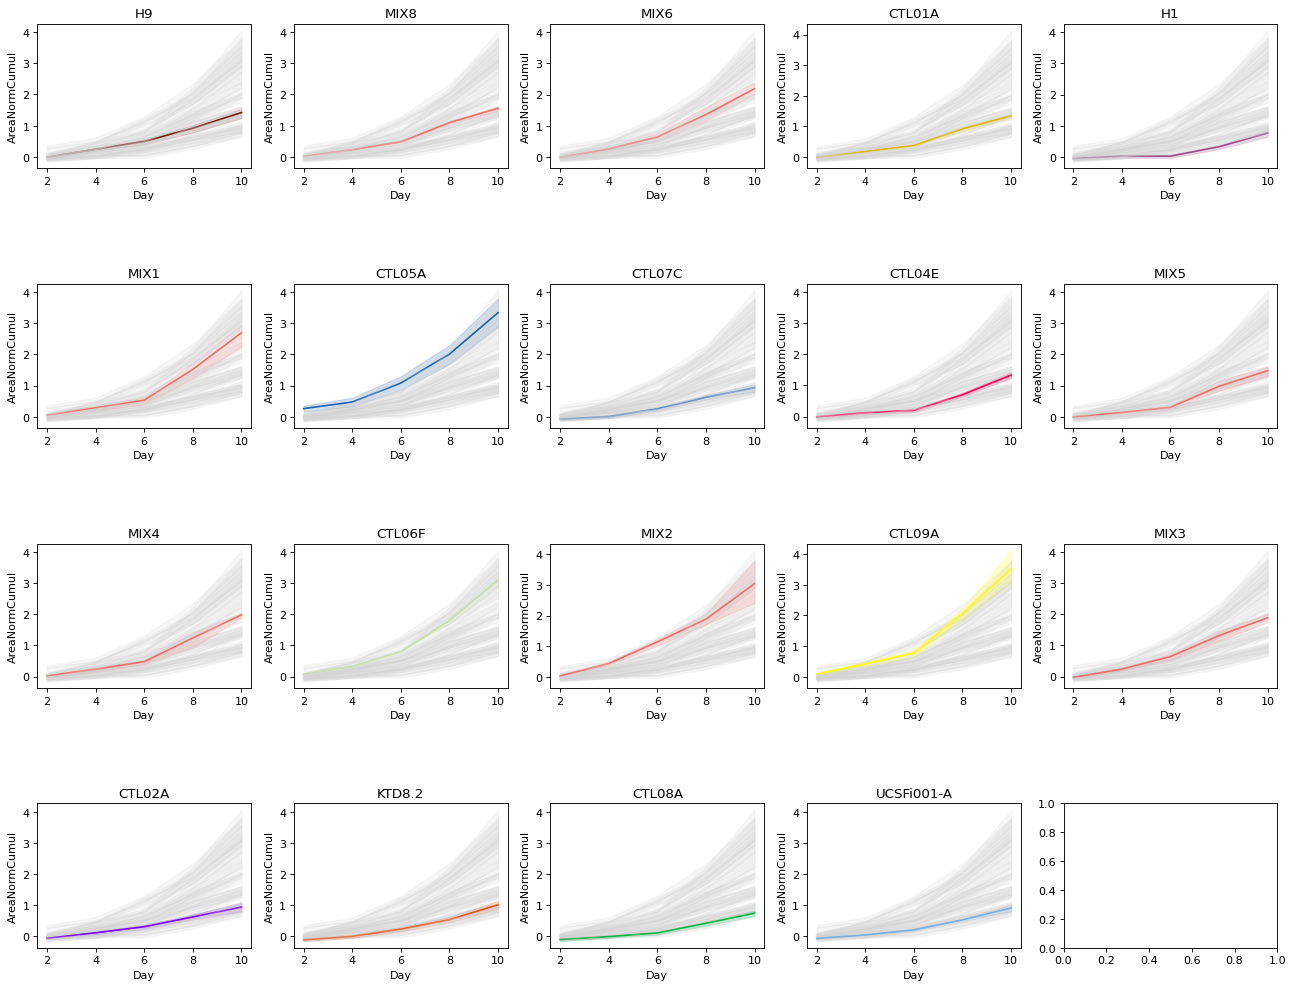

In [25]:

fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.8})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    #highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaNormCumul', hue='Line', palette=palette, ax = ax, markers='.', legend = None)

    ax.set_title(l)
    
plt.show()

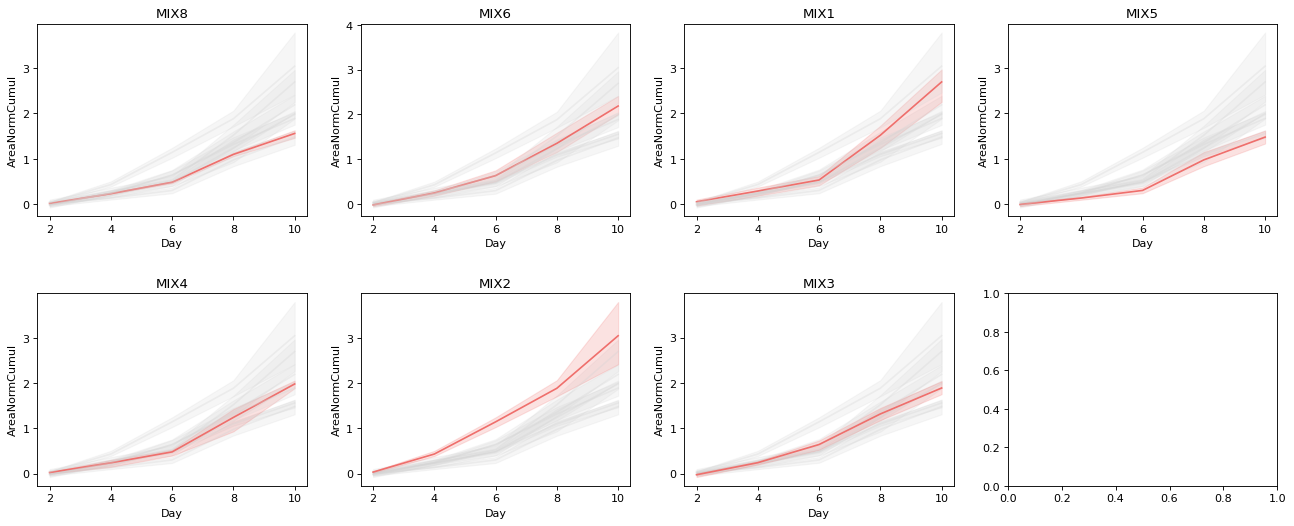

In [26]:
# only MIX
fig, axs = plt.subplots(2, 4, figsize = (20,7.5), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T

only_mix = df[df.Line.str.startswith('MIX')]

for l, ax in zip(only_mix.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in only_mix['Line'].unique()}
    palette[l] = line_palette[l]

    sns.lineplot(data=only_mix, x='Day', y='AreaNormCumul', hue='Line', palette=palette, ax = ax, legend = None)

    ax.set_title(l)
    
plt.show()

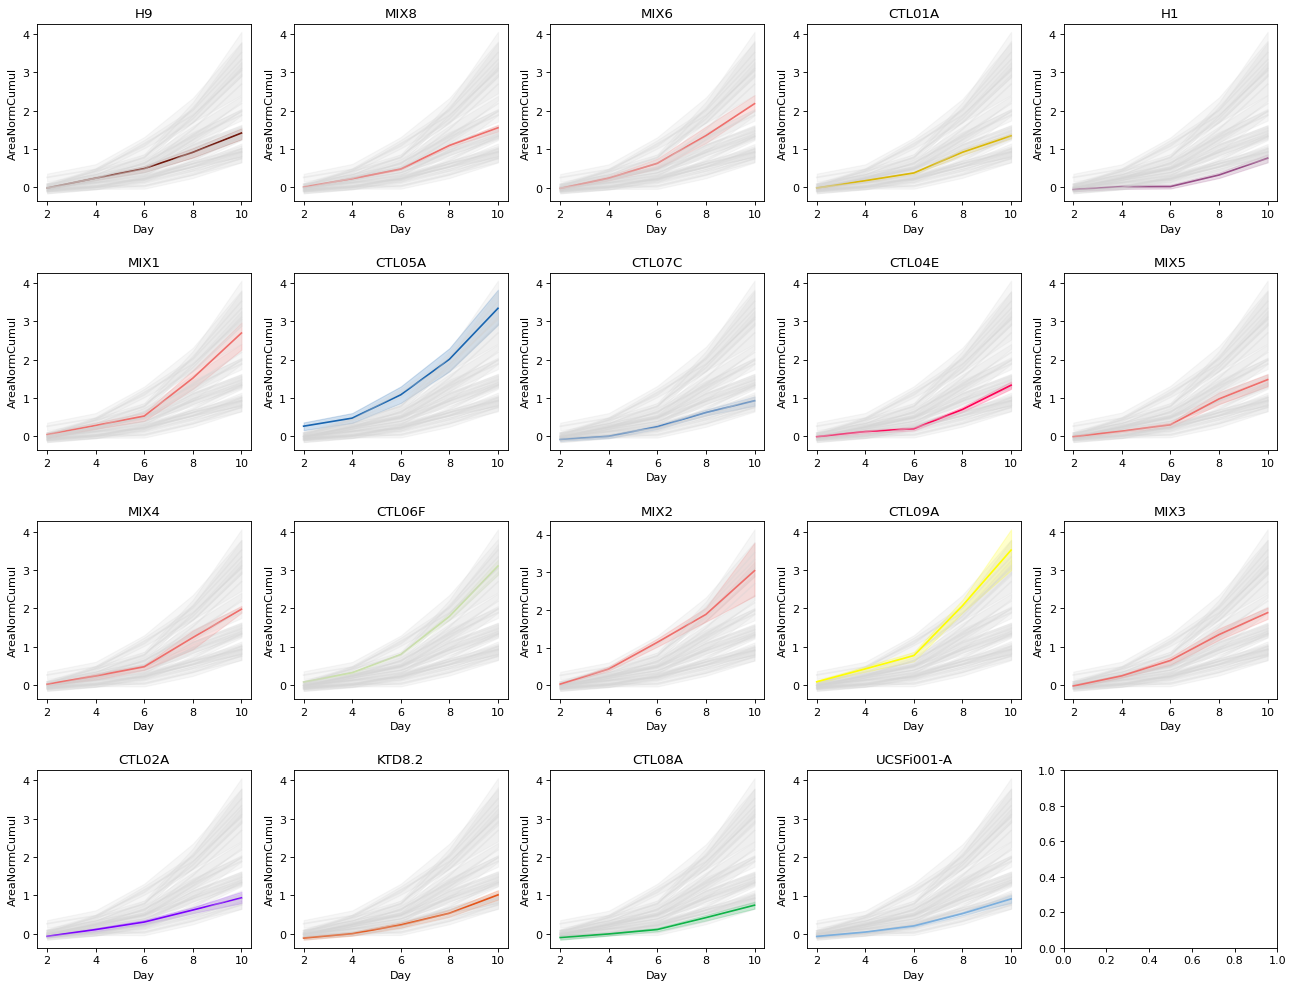

In [27]:
fig, axs = plt.subplots(4, 5, figsize = (20,15), gridspec_kw = {'hspace': 0.4})
axs = axs.flatten().T


for l, ax in zip(df.Line.unique(), axs):
    
    palette = {line: '#d3d3d350' for line in df['Line'].unique()}
    palette[l] = line_palette[l]

    #highlighted_data = df[df['Line'] == l]

    sns.lineplot(data=df, x='Day', y='AreaNormCumul', hue='Line', palette=palette, ax = ax, markers='.', legend = None)

    ax.set_title(l)
    
plt.show()

# Fit linear models
I'm fitting here a linear model between two points to get the estimate of a certain value at unmeasured time points that could match CENSUS-Seq data (ex. day 5).
Remember that the linear model will have the following formula:

`y = ax + b`

## 2 - 6 days on discrete derivative of the Normalized Area

We will have as outputs:
* `a`, that is the slope of the linear model. Here will correspond to the __discrete acceleration__ between day 2 and 6
* if we input 5 as `x`, we can get the __discrete derivative (approximating the velocity)__ of the area at day 5

In [28]:
slopes = {}
day_5_value = {}

day_2_6 = df[df.Day.isin([2, 4, 6])]

for l in day_2_6.Line.unique():
    #print(l)
    sub = day_2_6[day_2_6.Line == l]
    #print(sub)
    slopes[l] = {}
    slopes[l]['slope'], slopes[l]['intercept'] = stats.linregress(sub['Day'], sub['AreaNormDeriv'])[0], stats.linregress(sub['Day'], sub['AreaNormDeriv'])[1]
    day_5_value[l] = slopes[l]['slope']*5 + slopes[l]['intercept']

Order by __area__ at day 5:

In [29]:
day_5_value_df = pd.DataFrame(day_5_value.values(), day_5_value.keys())
day_5_value_df.columns = ['area_day_5']
day_5_value_df.sort_values(by = 'area_day_5').drop([i for i in day_5_value_df.index if i.startswith('MIX')])

area_day_5
H1            0.021668
CTL04E        0.087428
CTL08A        0.089850
UCSFi001-A    0.125670
KTD8.2        0.162129
CTL07C        0.166208
CTL02A        0.167993
CTL01A        0.179925
H9            0.230623
CTL09A        0.321764
CTL06F        0.365472
CTL05A        0.447351

# Fit linear model 2 - 6 days - Normalized Area

We will have as outputs:
* `a`, that is the slope of the linear model. Here will correspond to the __discrete derivative (approximating the velocity)__ between day 2 and 6
* if we input 5 as `x`, we can get the __area__ at day 5

In [30]:
slopes = {}
day_5_value = {}

day_2_6 = df[df.Day.isin([2, 4, 6])]

for l in day_2_6.Line.unique():
    #print(l)
    sub = day_2_6[day_2_6.Line == l]
    #print(sub)
    slopes[l] = {}
    slopes[l]['slope'], slopes[l]['intercept'] = stats.linregress(sub['Day'], sub['AreaNorm'])[0], stats.linregress(sub['Day'], sub['AreaNorm'])[1]
    day_5_value[l] = slopes[l]['slope']*5 + slopes[l]['intercept']

Order by __area__ at day 5:

In [31]:
day_5_value_df = pd.DataFrame(day_5_value.values(), day_5_value.keys())
day_5_value_df.columns = ['area_day_5']
day_5_value_df.sort_values(by = 'area_day_5').drop([i for i in day_5_value_df.index if i.startswith('MIX')])

area_day_5
H1            1.034938
CTL08A        1.112047
KTD8.2        1.254301
UCSFi001-A    1.267329
CTL07C        1.284918
CTL04E        1.310064
CTL02A        1.421236
CTL01A        1.558470
H9            1.736567
CTL06F        2.167277
CTL09A        2.191352
CTL05A        2.621664

Order by __slope__ (discrete __velocity__):

In [32]:
slopes_26_df = pd.DataFrame.from_dict(slopes).T
slopes_26_df.sort_values(by = 'slope').drop([i for i in day_5_value_df.index if i.startswith('MIX')])

slope  intercept
H1          0.038744   0.841218
CTL08A      0.103658   0.593758
CTL04E      0.104177   0.789178
UCSFi001-A  0.136876   0.582948
CTL07C      0.165565   0.457092
KTD8.2      0.170923   0.399685
CTL02A      0.186715   0.487661
CTL01A      0.195823   0.579355
H9          0.253743   0.467853
CTL09A      0.341854   0.482084
CTL06F      0.359294   0.370805
CTL05A      0.409597   0.573681

In [33]:
slopes_26_df.sort_values(by = 'slope').drop([i for i in day_5_value_df.index if i.startswith('MIX')]).to_csv('../../data/csv/CBO_day26_fit.csv')

In [34]:
pd.options.display.float_format = '{:.8f}'.format
np.round(slopes_26_df.sort_values(by = 'slope').drop([i for i in day_5_value_df.index if i.startswith('MIX')]), 8)

slope  intercept
H1         0.03874407 0.84121754
CTL08A     0.10365790 0.59375758
CTL04E     0.10417706 0.78917833
UCSFi001-A 0.13687630 0.58294760
CTL07C     0.16556526 0.45709195
KTD8.2     0.17092316 0.39968519
CTL02A     0.18671512 0.48766055
CTL01A     0.19582311 0.57935480
H9         0.25374267 0.46785332
CTL09A     0.34185370 0.48208398
CTL06F     0.35929425 0.37080550
CTL05A     0.40959658 0.57368113

# Fit linear model 0 - 2 days - Normalized Area

We will have as outputs:
* `a`, that is the slope of the linear model. Here will correspond to the __discrete derivative (approximating the velocity)__ between day 0 and 2

In [35]:
slopes_02 = {}
#day__value = {}

day_02 = df[df.Day.isin([0, 2])]

for l in day_02.Line.unique():
    #print(l)
    sub = day_02[day_02.Line == l]
    #print(sub)
    slopes_02[l] = {}
    slopes_02[l]['slope'], slopes_02[l]['intercept'] = stats.linregress(sub['Day'], sub['AreaNorm'])[0], stats.linregress(sub['Day'], sub['AreaNorm'])[1]

In [36]:
slopes_02_df = pd.DataFrame.from_dict(slopes_02).T
slopes_02_df.sort_values(by = 'slope').drop([i for i in day_5_value_df.index if i.startswith('MIX')])

slope  intercept
KTD8.2     -0.10977206 1.00000000
CTL08A     -0.09572122 1.00000000
CTL07C     -0.07797156 1.00000000
CTL02A     -0.06630434 1.00000000
UCSFi001-A -0.06424445 1.00000000
H1         -0.05319884 1.00000000
H9         -0.01346698 1.00000000
CTL01A     -0.01254545 1.00000000
CTL04E     -0.01079201 1.00000000
CTL06F      0.08357017 1.00000000
CTL09A      0.08468443 1.00000000
CTL05A      0.26305873 1.00000000

In [37]:
slopes_02_df.sort_values(by = 'slope').drop([i for i in day_5_value_df.index if i.startswith('MIX')]).to_csv('../../data/csv/CBO_day02_fit.csv')

### Differences in slope
We can compute the difference in the slopes, to model whether differences in the __rate of growth__ between day 0 and and between day 2 and 6 is informative of a specific capacity of growth. 


In [38]:
differenceSlopes = pd.concat([slopes_26_df['slope'], slopes_02_df['slope']], axis = 1)
differenceSlopes.columns = ['slope2-6', 'slope0-2']

In [39]:
results = differenceSlopes['slope2-6'] - differenceSlopes['slope0-2']
results.sort_values()

H1           0.09194291
CTL04E       0.11496907
CTL05A       0.14653785
MIX5         0.16409198
MIX1         0.18997441
CTL08A       0.19937913
UCSFi001-A   0.20112075
MIX4         0.20417591
CTL01A       0.20836856
MIX8         0.21877104
CTL07C       0.24353682
CTL02A       0.25301946
CTL09A       0.25716927
H9           0.26720965
CTL06F       0.27572409
KTD8.2       0.28069522
MIX6         0.34539905
MIX3         0.35904101
MIX2         0.52244262
dtype: float64

In [40]:
results = differenceSlopes['slope2-6'] + differenceSlopes['slope0-2']
results.sort_values()

H1           -0.01445477
CTL08A        0.00793668
KTD8.2        0.06115110
UCSFi001-A    0.07263185
CTL07C        0.08759370
CTL04E        0.09338505
CTL02A        0.12041078
MIX5          0.14563635
CTL01A        0.18327767
H9            0.24027570
MIX8          0.24794616
MIX4          0.25025467
MIX1          0.29045880
MIX3          0.30767650
MIX6          0.30879630
CTL09A        0.42653813
CTL06F        0.44286442
MIX2          0.58649481
CTL05A        0.67265531
dtype: float64